<a href="https://colab.research.google.com/github/Shivasilas3n/Insightful.github.io/blob/main/Airline_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

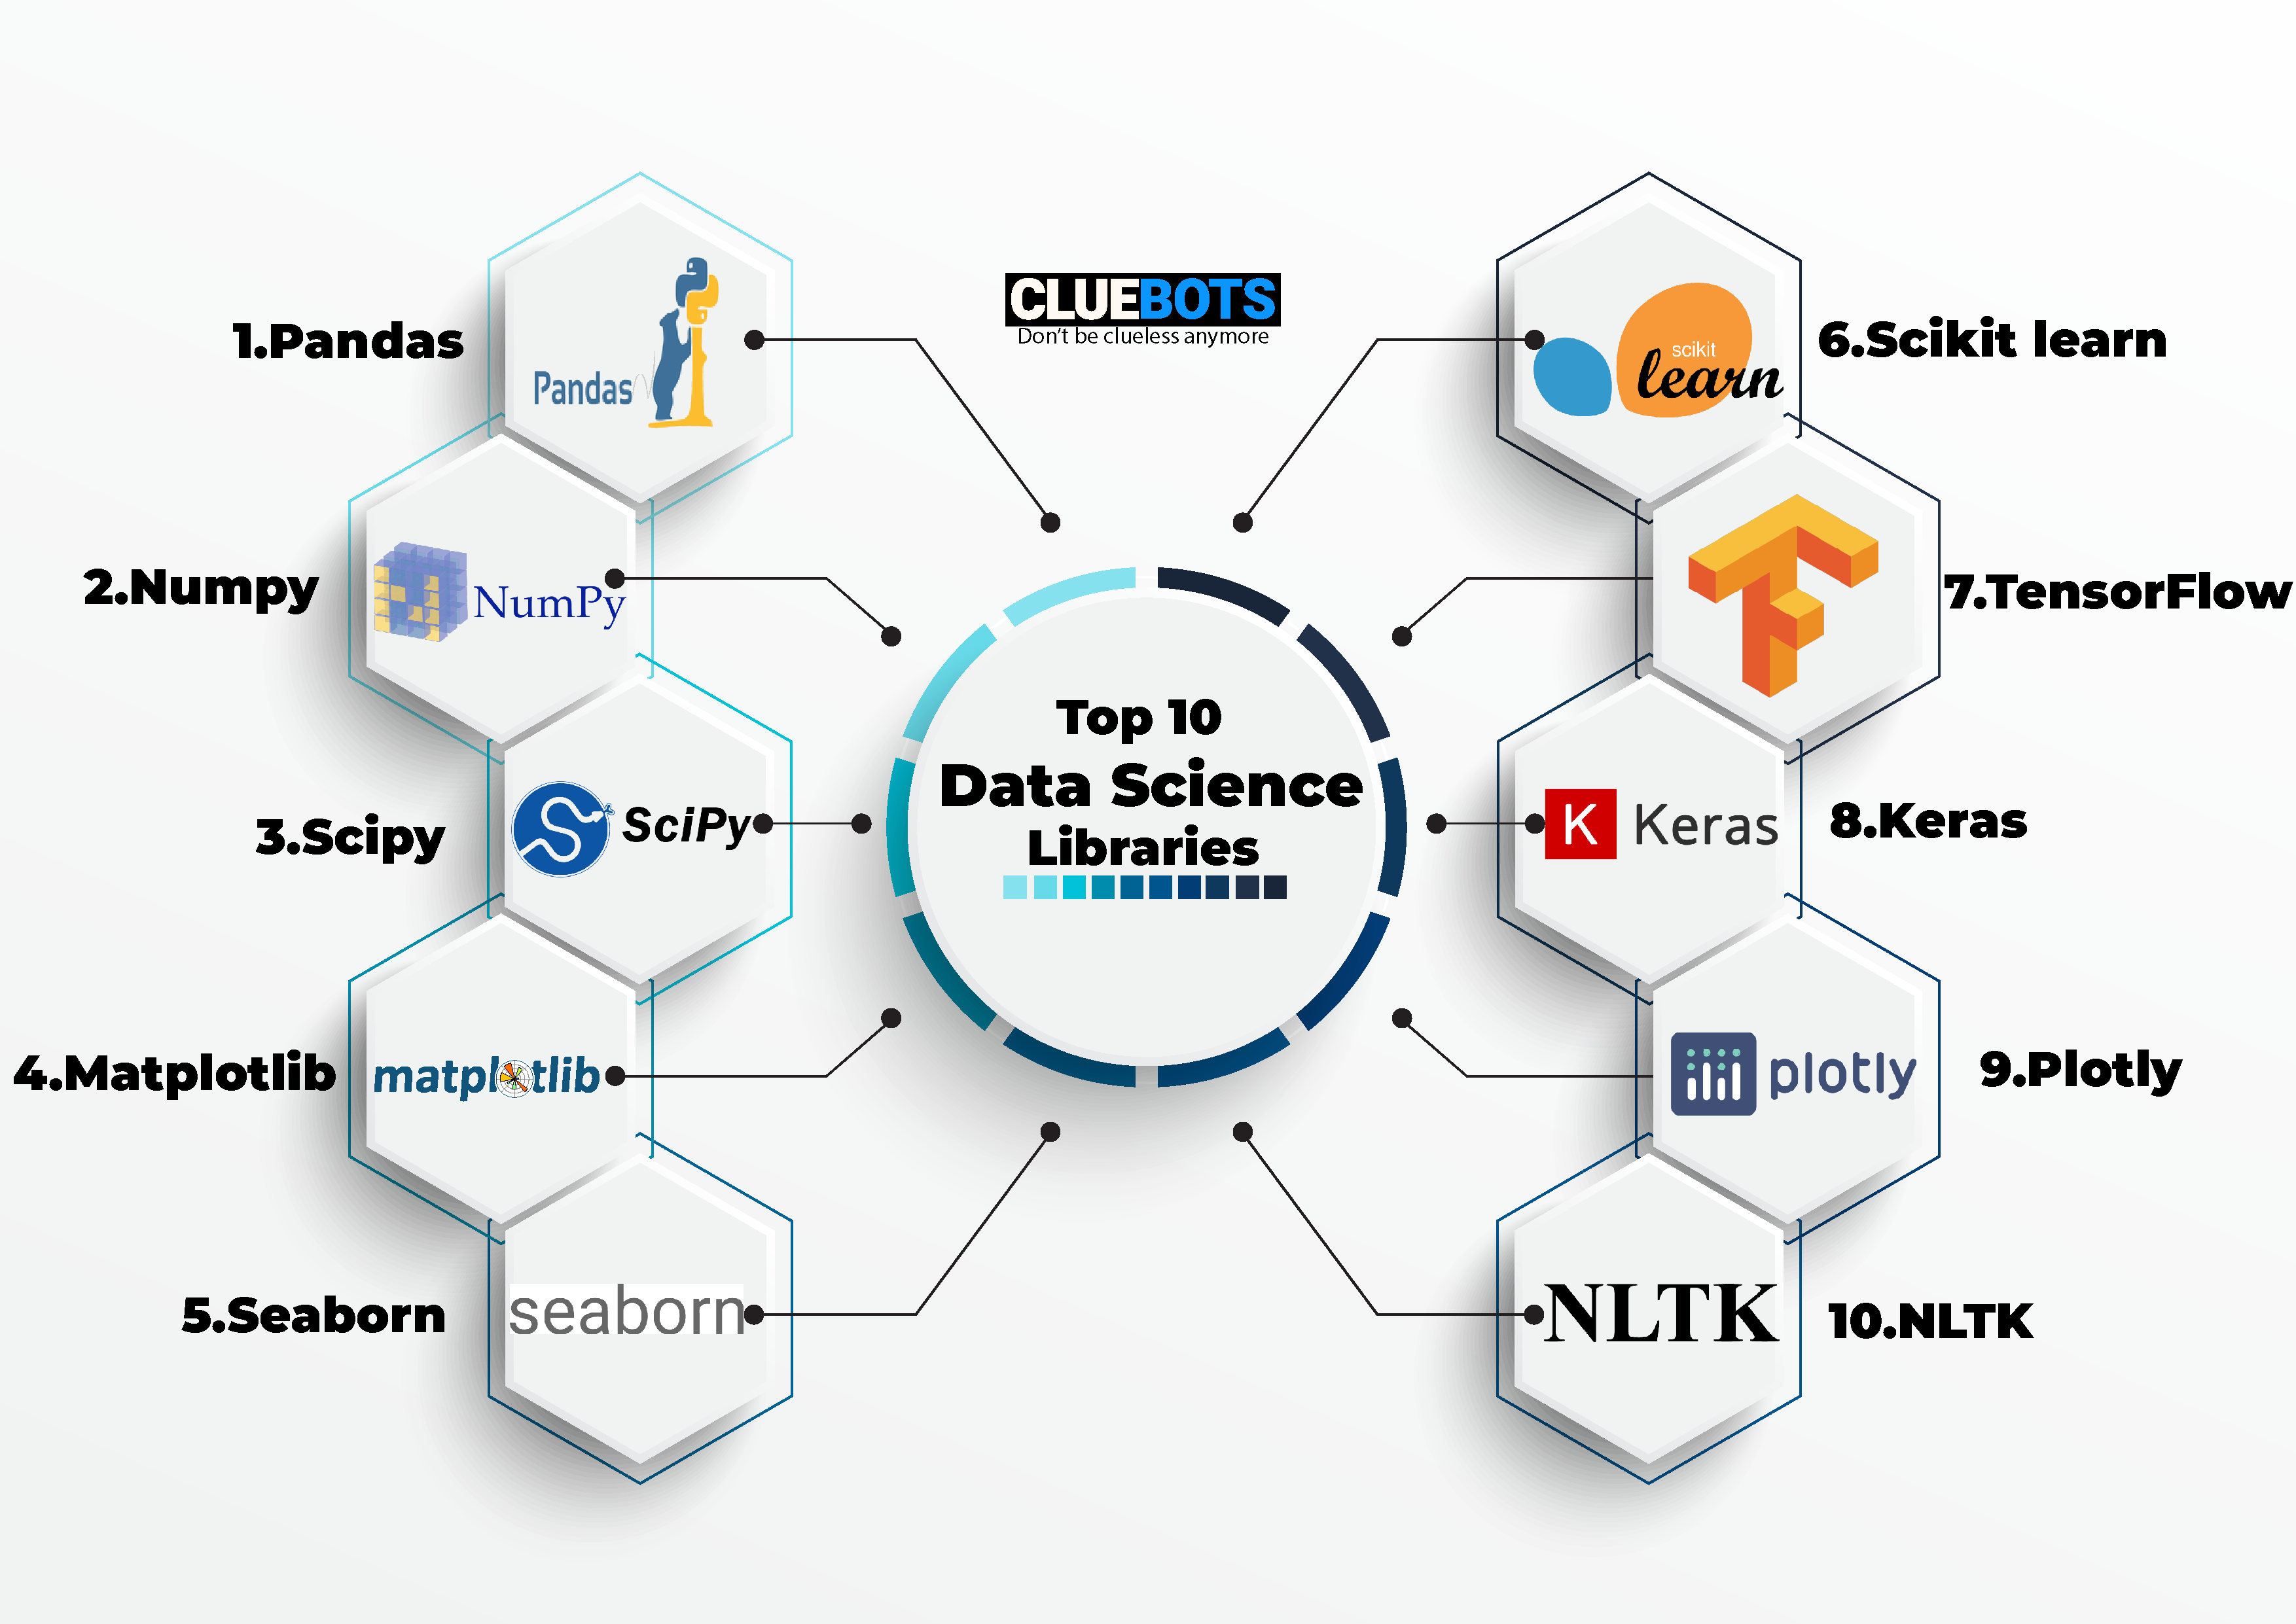





In [ ]:
!pip install kaggle


In [ ]:
# Import necessary libraries


import os  # For interacting with the operating system, e.g., changing directories
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold  # For splitting the data and cross-validation
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier  # For decision tree model
from sklearn.ensemble import RandomForestClassifier  # For random forest model
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve  # For model evaluation metrics
import matplotlib.pyplot as plt  # For plotting and visualizations
from zipfile import ZipFile  # For unzipping folders


In [ ]:
# Set Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'shiva93'
os.environ['KAGGLE_KEY'] = 'a66f848d7efe2d406c6ea695a6fcd885'

# Define the Kaggle dataset path
kaggle_dataset_path = 'patrickzel/flight-delay-and-cancellation-dataset-2019-2023'

# Download the dataset from Kaggle
!kaggle datasets download -d {kaggle_dataset_path}

# Unzip the dataset
with ZipFile('flight-delay-and-cancellation-dataset-2019-2023.zip', 'r') as zip_ref:
    zip_ref.extractall('flight_delay_data')

# Load the dataset
file_path = 'flight_delay_data/flights_sample_3m.csv'
airlines_data = pd.read_csv(file_path)



Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023
License(s): other
flight-delay-and-cancellation-dataset-2019-2023.zip: Skipping, found more recently modified local copy (use --force to force download)
      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST    DEST_CITY  ...  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   Newark, NJ  ...   
1     19790       1149    MSP      Minneapolis, MN  SEA  Seattle, WA  ...   

   DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
0       0.0             186.0         176.0     153.0    1065.0   
1       0.0             235.0         236.0     189.0    1399.0   

   DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SE

In [ ]:
airlines_data.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
